# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 2</center>
### <center> Arboles de decision</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold

In [3]:
df = pd.read_csv("../dataset/hotels_train_procesado.csv")
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'hotel_encoding',
       'tiene_hijos', 'es_extranjero', 'es_portugues', 'es_ingles',
       'es_frances', 'es_espanol', 'es_aleman', 'reserved_room_was_assigned',
       'required_a_car_parking_space', 'solo_desayuna_en_el_hotel',
       'pidio_todas_comidas', 'reservo_online', 'reservo_en_grupo',
       'reservo_sin_reembols

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [107]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    #"lead_time",
    "reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    "stays_in_week_nights",

    "tiene_hijos",
    "adults",
    # "children",
    # "babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    # "es_extranjero",
    "es_portugues",
    #"es_ingles",
    #"es_frances",
    #"es_espanol",
    #"es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", "previous_bookings_not_canceled",
    #"total_reservas_previas"
    "total_of_special_requests",
    "booking_changes",

    # 'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    # 'required_car_parking_spaces',
    "required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_paquete",
    
    # "days_in_waiting_list",
    "tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    "agent1",
    "agent1",
    "agent6",
]

dividimos el dataset en entrenamiento y validacion, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que el modelo predice bien a registros no vistos anteriormente

In [108]:
X = df[attrs].values
y = df[target].values

X_train, X_val,  y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

- Definimos el conjunto de parametros del decision tree:
    * `max_depth`: no deja que alguna rama principal tenga mas que esta altura/profundidad
    * `min_samples_split`: Si un nodo no tiene este mínimo de samples en los que hacer una pregunta, se vuelve hoja.
    * `min_samples_leaf`: El mínimo valor que tiene que tener un nodo para convertirse en una hoja. Es decir puedo partir un nodo, pero si me queda de un lado una hoja con muy pocos samples, entonces no puedo hacer esa partición.
    * `ccp_alpha`: mide la intensidad de la poda del arbol. mientras mas grande el ccp_alpha, mas poda se hace luego. 

In [109]:
params_grid = {
    "max_depth": list(range(15, 25)), 
    "min_samples_leaf": list(range(15, 30)), 
    "min_samples_split": list(range(10, 30)),
    "ccp_alpha": np.linspace(0, 2.5e-4, 50),
}

No tenemos una razon especifica por la cual tomamos 4 como valor del cross validation, sino mas bien que nos parece un numero adecuado, que no vuelve demasiado chico ni demasiado grande las porciones en las que se van evaluando cuando se hace el cross validation. Lo importante es que utilizamos StratifiedKfold, para que respete las proporciones de las clases.

In [110]:
kfoldcv = StratifiedKFold(n_splits=4)

tree = DecisionTreeClassifier(criterion="gini")

model = RandomizedSearchCV(
    estimator=tree,
    param_distributions=params_grid,
    scoring=make_scorer(f1_score),
    cv=kfoldcv,
    n_iter=20,
)

Entrenamos al modelo:

In [119]:
model.fit(X_train, y_train)
print("Los mejores parametros encontrados son: ", model.best_params_)
print("con un f1 score: ", model.best_score_)

Los mejores parametros encontrados son:  {'min_samples_split': 13, 'min_samples_leaf': 17, 'max_depth': 20, 'ccp_alpha': 0.0001326530612244898}
con un f1 score:  0.85021999262693


Evaluamos como es el score f1 en el conjunto de validacion:

In [120]:
model.score(X_val, y_val)

0.852498017446471

In [121]:
tree = tree.set_params(**model.best_params_)
tree.fit(X_train, y_train)

tree.score(X_val, y_val)

0.8497940725187757

precision 0.8445943311630083
recall 0.8752727272727273


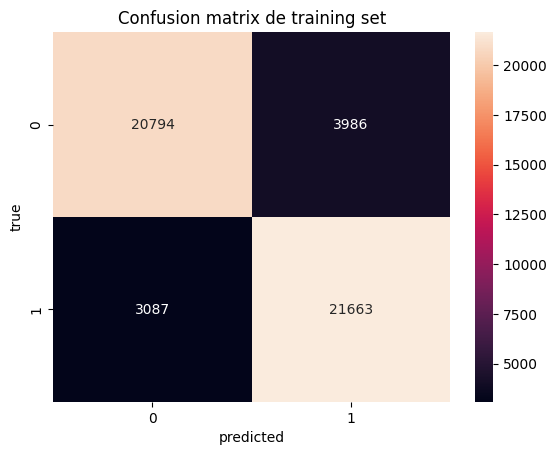

In [126]:
y_pred = tree.predict(X_train)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set")
print("precision", precision_score(y_train, y_pred))
print("recall", recall_score(y_train, y_pred))

Pero es mas importante realizarlo sobre el validation set, ya que esas son las metricas que importan del modelo, las cuales dicen si sabe generalizar o no:

precision 0.8373578439009192
recall 0.8681957680503958


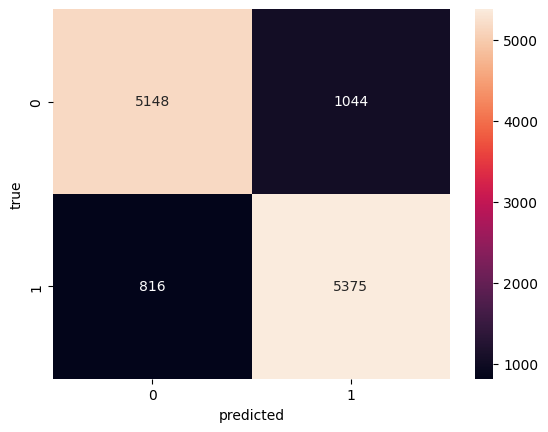

In [122]:
y_pred = tree.predict(X_val)
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix del validation set")
print("precision", precision_score(y_val, y_pred))
print("recall", recall_score(y_val, y_pred))

In [118]:
plt.figure(figsize=(100,100))
tree_plot = plot_tree(tree,
                         max_depth=4,
                         feature_names=df[attrs].columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)
plt.show()

La variable mas importante para el arbol de decision, es decir, la que al preguntar divide mejor el dataset si el criterio es impureza de gini es `reservo_sin_rembolso`,  la cual siempre se pregunta primero. Otra pregunta que se hace muy temprano en cada rama es si es extranjero (si es portugues),  lo cual tiene sentido, ya que si alguien es extranjero suele tener un viaje mas planeado o seguir a un agente de viaje en especifico. 

Otras variables que no se ven en los primeros niveles del arbol pero si son muy importantes son los agentes (el one hot encoding que le hicimos a los mas importantes), ya que notamos una mejora significante del score cuando las utilizamos (en ambos el conjunto de validacion y entrenamiento)

In [117]:
df_test = pd.read_csv("../dataset/hotels_test_procesado.csv")
assert(len(df_test)==26535)

prediccion = model.predict(df_test[attrs].values)
assert(len(prediccion)==26535)

submit = pd.DataFrame(
    {"is_canceled": prediccion},
    index=df_test["id"],
)
assert(len(submit)==26535)

submit.to_csv("../dataset/submit.csv")